As the data from the Hippokratia paper is insufficient, I can't correlate the data as it wouldn't tell us anything of value, However, by using this data as a basis and then creating a random data matrix by using the mean of both height and ROM and then create a range by +/- from the mean of the Preop, 48 months after implantation and 96 months after implanatation for the mean Height and ROM, we can simulate the data and then analyse the findings. 

First a plan of action must be created to understand how i will analyse this data,

- Simulate data using data from the Hippokratia paper

- Check for normality to see if the data can be analysed 

- Use different statiscal analysis tests to look at the correlation between mean height and ROM at the Preop, 48 months and 96 months level

In [15]:
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats 
HR = pd.read_csv("Height and ROM.csv")
HR

,Time,ROM M,ROM SD,Height M,Height SD
0,Preop,28.2,25.7,7.9,1.4
1,48 months,26.4,9.9,9.1,1.1
2,96 months,20.2,11.8,11.3,2.7


In [16]:
df = pd.DataFrame(HR)

RMpre = (df.iloc[0,1])
RSpre = (df.iloc[0,2])
HMpre = (df.iloc[0,3])
HSpre = (df.iloc[0,4])

ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size = (10,10)))
Height_preop = np.abs(np.random.normal(loc= HMpre, scale= HSpre, size = (10,10)))

In [17]:
RM48 = (df.iloc[1,1])
RS48 = (df.iloc[1,2])
HM48 = (df.iloc[1,3])
HS48 = (df.iloc[1,4])


ROM_48m = np.abs(np.random.normal(loc=RM48, scale=RS48, size = (10,10)))
Height_48m = np.abs(np.random.normal(loc= HM48, scale= HS48, size = (10,10)))

In [18]:
RM96 = (df.iloc[2,1])
RS96 = (df.iloc[2,2])
HM96 = (df.iloc[2,3])
HS96 = (df.iloc[2,4])


ROM_96m = np.abs(np.random.normal(loc=RM96, scale=RS96, size = (10,10)))
Height_96m = np.abs(np.random.normal(loc= HM96, scale= HS96, size = (10,10)))


After creating some variables for the Mean heights and ROMs for preop, 48 months and 96 months we can go and check for normality by both creating a histogram and visually checking for normality and also by using the shapiro-wilk test for normality 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


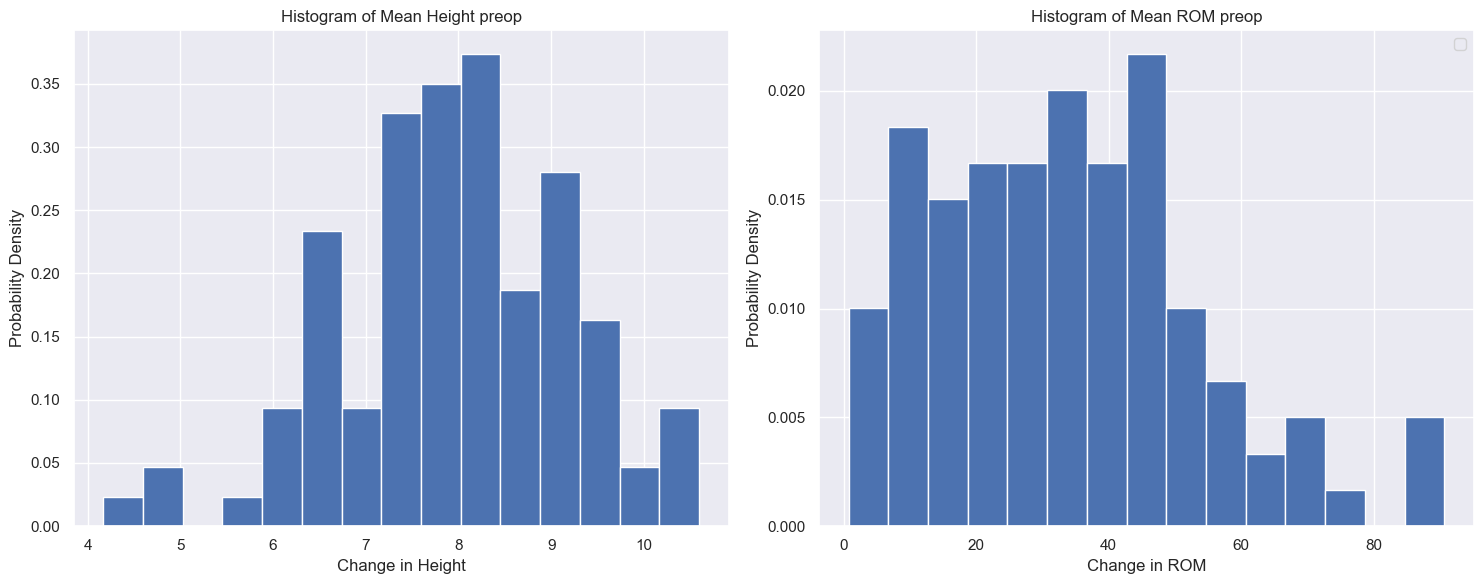

In [19]:
import matplotlib.pyplot as plt

ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size = 100))
Height_preop = np.abs(np.random.normal(loc= HMpre, scale= HSpre, size = 100))


plt.figure(figsize=(15, 6))

# Histogram for mean Height
plt.subplot(1, 2, 1)
plt.hist(Height_preop, bins=15, density=True)
plt.title('Histogram of Mean Height preop')
plt.xlabel('Change in Height')
plt.ylabel('Probability Density')

# Histogram for mean ROM
plt.subplot(1, 2, 2)
plt.hist(ROM_preop, bins=15, density=True)
plt.title('Histogram of Mean ROM preop')
plt.xlabel('Change in ROM')
plt.ylabel('Probability Density')
plt.legend( )

plt.tight_layout()
plt.show()


Looking at both histograms it can be seen that they both follow a normal distribution 


In [20]:
# Shapiro-Wilk test for normality 
from scipy.stats import shapiro 


np.random.seed(1)

ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size =(10,10)))
Height_preop = np.abs(np.random.normal(loc= HMpre, scale= HSpre, size = (10,10)))
Preop = ROM_preop + Height_preop

print(f'shapiro ROM_preop: {shapiro(Preop)}')




shapiro ROM_preop: ShapiroResult(statistic=0.9704678654670715, pvalue=0.024007821455597878)


The shapiro-wilk test looks at 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


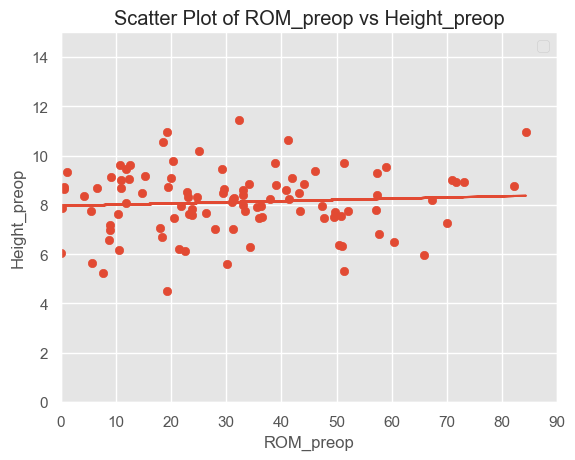

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.style.use('ggplot')

# Creating arrays for mean height and ROM
x = np.array(ROM_preop).flatten()
y = np.array(Height_preop).flatten()


plt.scatter(x, y)

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add line of best fit to plot
plt.plot(x, a*x+b)


plt.xlim(0,90)
plt.ylim(0,15)
plt.xlabel('ROM_preop')
plt.ylabel('Height_preop')
plt.title('Scatter Plot of ROM_preop vs Height_preop')
plt.legend( )

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


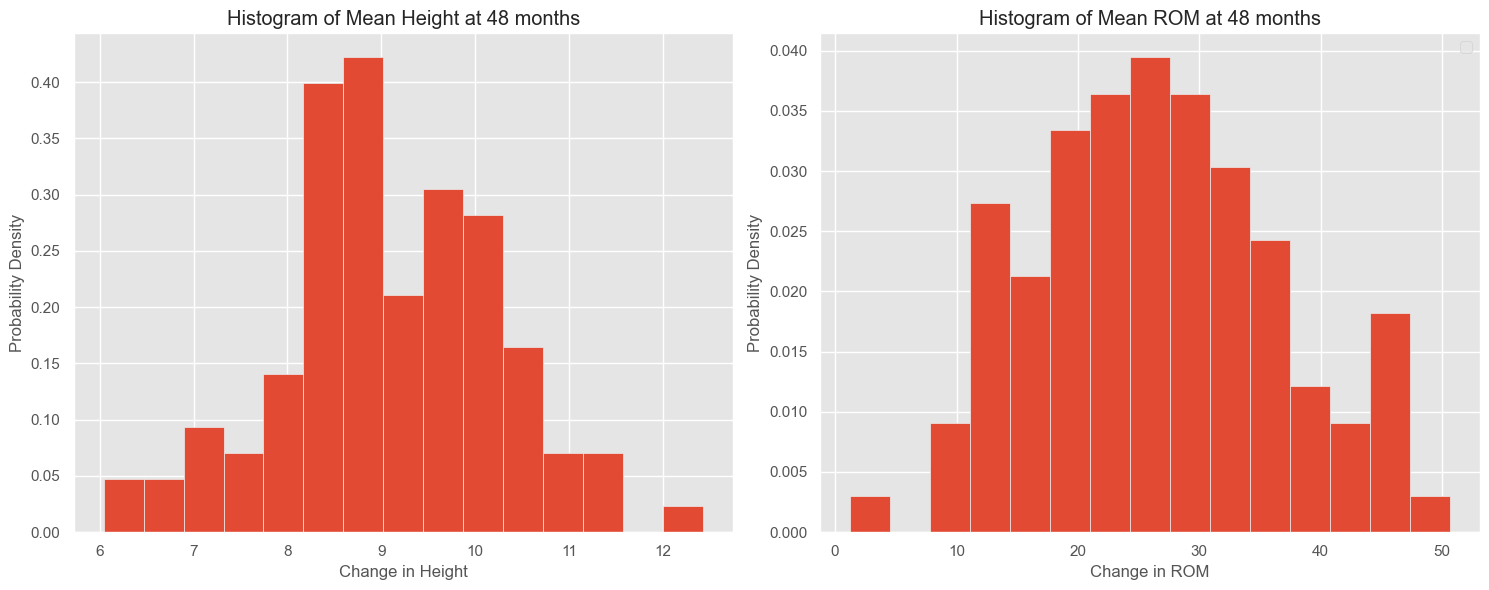

In [22]:
import matplotlib.pyplot as plt

ROM_48m = np.abs(np.random.normal(loc=RM48, scale=RS48, size = 100))
Height_48m = np.abs(np.random.normal(loc= HM48, scale= HS48, size = 100))



plt.figure(figsize=(15, 6))

# Histogram for mean Height
plt.subplot(1, 2, 1)
plt.hist(Height_48m, bins=15, density=True)
plt.title('Histogram of Mean Height at 48 months')
plt.xlabel('Change in Height')
plt.ylabel('Probability Density')

# Histogram for mean ROM
plt.subplot(1, 2, 2)
plt.hist(ROM_48m, bins=15, density=True)
plt.title('Histogram of Mean ROM at 48 months')
plt.xlabel('Change in ROM')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
# Shapiro-Wilk test for normality 
from scipy.stats import shapiro 


np.random.seed(1)

ROM_48m = np.abs(np.random.normal(loc=RM48, scale=RS48, size = (10,10)))
Height_48m = np.abs(np.random.normal(loc= HM48, scale= HS48, size = (10,10)))
month_48 = ROM_48m + Height_48m


print(f'shapiro ROM_48m and Height_48m: {shapiro(month_48)}')


shapiro ROM_48m and Height_48m: ShapiroResult(statistic=0.9942388534545898, pvalue=0.9503603577613831)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


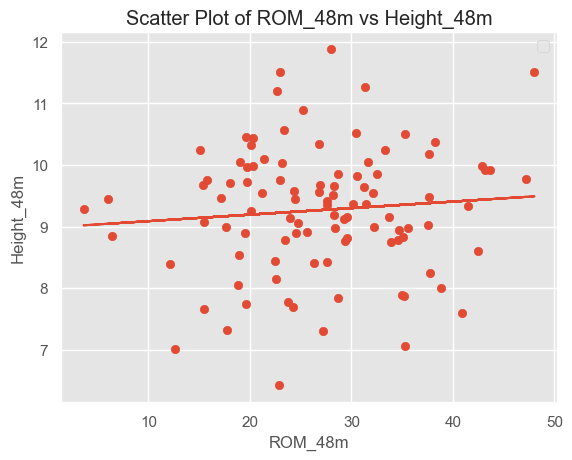

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.style.use('ggplot')

# Creating arrays for mean height and ROM
x = np.array(ROM_48m).flatten()
y = np.array(Height_48m).flatten()


plt.scatter(x, y)

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add line of best fit to plot
plt.plot(x, a*x+b)


plt.xlabel('ROM_48m')
plt.ylabel('Height_48m')
plt.title('Scatter Plot of ROM_48m vs Height_48m')
plt.legend( )

plt.show()

In [25]:
# shapiro-wilk test for all data 

ROM_48m = np.abs(np.random.normal(loc=RM48, scale=RS48, size = (10,10)))
Height_48m = np.abs(np.random.normal(loc= HM48, scale= HS48, size = (10,10)))
ROM_96m = np.abs(np.random.normal(loc=RM96, scale=RS96, size = (10,10)))
Height_96m = np.abs(np.random.normal(loc= HM96, scale= HS96, size = (10,10)))
ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size = (10,10)))
Height_preop = np.abs(np.random.normal(loc= HMpre, scale= HSpre, size = (10,10)))

# look at how to run this 1000 times and then take the mean 

Shapiro_Wilk_all_data = ROM_preop + Height_preop + ROM_48m + Height_48m + ROM_96m + Height_96m


print(f'Shapiro_Wilk_all_data: {shapiro(Shapiro_Wilk_all_data)}')

Shapiro_Wilk_all_data: ShapiroResult(statistic=0.9843966364860535, pvalue=0.28708401322364807)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


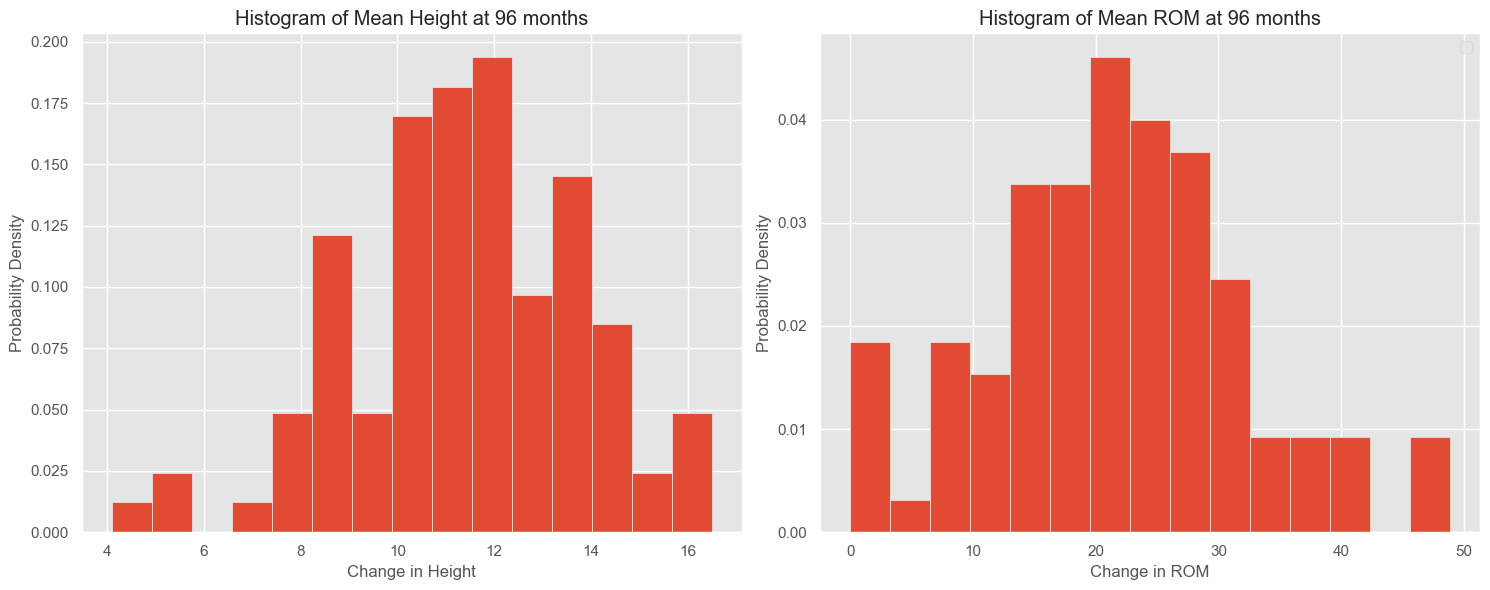

In [26]:
import matplotlib.pyplot as plt

ROM_96m = np.abs(np.random.normal(loc=RM96, scale=RS96, size = 100))
Height_96m = np.abs(np.random.normal(loc= HM96, scale= HS96, size = 100))

plt.figure(figsize=(15, 6))

# Histogram for mean Height
plt.subplot(1, 2, 1)
plt.hist(Height_96m, bins=15, density=True)
plt.title('Histogram of Mean Height at 96 months')
plt.xlabel('Change in Height')
plt.ylabel('Probability Density')

# Histogram for mean ROM
plt.subplot(1, 2, 2)
plt.hist(ROM_96m, bins=15, density=True)
plt.title('Histogram of Mean ROM at 96 months')
plt.xlabel('Change in ROM')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Shapiro-Wilk test for normality 
from scipy.stats import shapiro 


np.random.seed(1)

ROM_96m = np.abs(np.random.normal(loc=RM96, scale=RS96, size =(10,10)))
Height_96m = np.abs(np.random.normal(loc= HM96, scale= HS96, size =(10,10)))
month_96 = ROM_96m + Height_96m

print(f'shapiro ROM_96m: {shapiro(month_96)}')


shapiro ROM_96m: ShapiroResult(statistic=0.9914829134941101, pvalue=0.7826279401779175)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


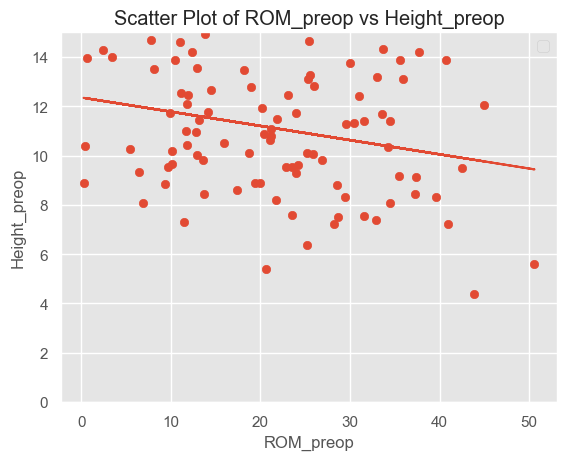

In [30]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.style.use('ggplot')

# Creating arrays for mean height and ROM
x = np.array(ROM_96m).flatten()
y = np.array(Height_96m).flatten()


plt.scatter(x, y)

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add line of best fit to plot
plt.plot(x, a*x+b)


#plt.xlim(0,90)
plt.ylim(0,15)
plt.xlabel('ROM_preop')
plt.ylabel('Height_preop')
plt.title('Scatter Plot of ROM_preop vs Height_preop')
plt.legend( )

plt.show()



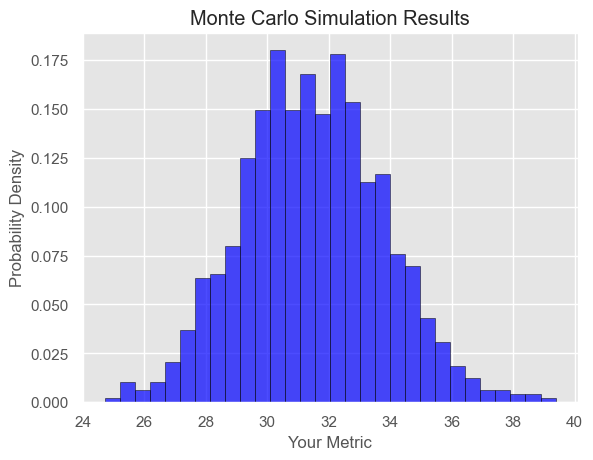

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size = 100))
#Height_preop = np.abs(np.random.normal(loc= HMpre, scale= HSpre, size = 100))

# Number of Monte Carlo simulations
num_simulations = 1000

# Array to store results
results = []

# Perform Monte Carlo simulation
for _ in range(num_simulations):
   
    sample = np.random.choice(ROM_preop, size=len(ROM_preop), replace=True)
    

    result = np.mean(sample)  
    
    # Append the result to the results array
    results.append(result)

# Plot the histogram of results
plt.hist(results, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Monte Carlo Simulation Results')
plt.xlabel('')
plt.ylabel('Probability Density')
plt.show()


In [29]:
from scipy.stats import shapiro

# Number of simulations
num_simulations = 100

# Placeholder for p-values
p_values = []

# Simulate and test
for _ in range(num_simulations):
    ROM_preop = np.abs(np.random.normal(loc=RMpre, scale=RSpre, size=(10, 10)))
    Height_preop = np.abs(np.random.normal(loc=HMpre, scale=HSpre, size=(10, 10)))
    ROM_48m = np.abs(np.random.normal(loc=RM48, scale=RS48, size=(10, 10)))
    Height_48m = np.abs(np.random.normal(loc=HM48, scale=HS48, size=(10, 10)))
    ROM_96m = np.abs(np.random.normal(loc=RM96, scale=RS96, size=(10, 10)))
    Height_96m = np.abs(np.random.normal(loc=HM96, scale=HS96, size=(10, 10)))

    combined_data = np.concatenate([ROM_preop.flatten(), Height_preop.flatten(), ROM_48m.flatten(),
                                    Height_48m.flatten(), ROM_96m.flatten(), Height_96m.flatten()])

    stat, p_value = shapiro(combined_data)
    p_values.append(p_value)

# Calculate the mean p-value
mean_p_value = np.mean(p_values)

print(f'Mean Shapiro-Wilk Test p-value: {mean_p_value}')


Mean Shapiro-Wilk Test p-value: 1.6285911788080366e-25
